<a href="https://colab.research.google.com/github/Asif-PA/Bank-Dataset-Analysis/blob/main/Analysis_On_Banking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import data sets and Load data set
Hint: Make use of with statement and write a function to load the data if you are not able to load through the panda's method.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 # Load and clean the data
def load_clean_data(input_file):

    with open(input_file, 'r') as file:
        data = file.read().replace('"', '').replace(';', ',')

    df = pd.read_csv(StringIO(data))
    return df

input_file = '/content/bank.csv'
data = load_clean_data(input_file)



In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**2. Make the data proper to make use of data for analysis**

**A. Identify the Features data types before entering into the analysis**

**B..Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.**

**C.Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.**

 **Find duplicates (if necessary)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


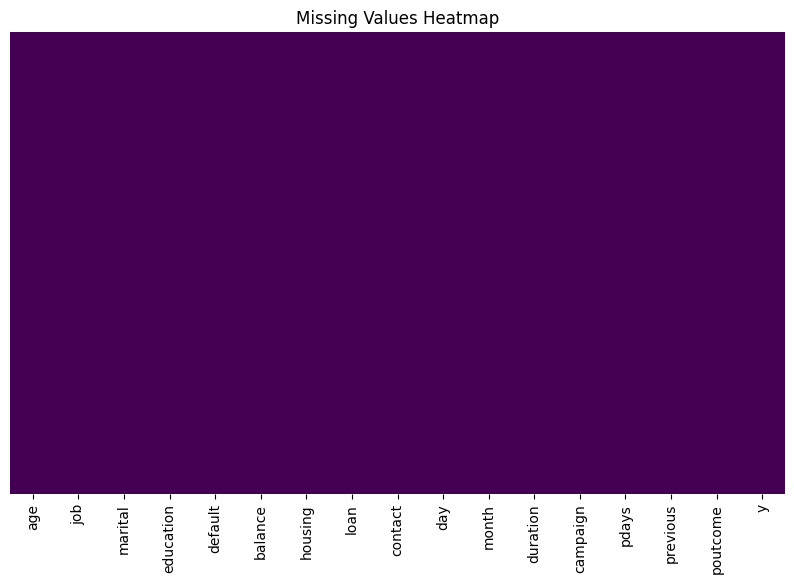

In [ ]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
def convert_data_types(df):
    # Converting numerical columns to appropriate numeric types
    numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Convert categorical columns to 'category' type
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                           'contact', 'month', 'poutcome', 'y']
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    return df

data = convert_data_types(data)
print(data.dtypes)


age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object


In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.**

In [ ]:
Average_balance = data.groupby('y')['balance'].mean()
print("Average balance of Subscribed and Non-Subscribed Customers:")
print(Average_balance)

Average balance of Subscribed and Non-Subscribed Customers:
y
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64


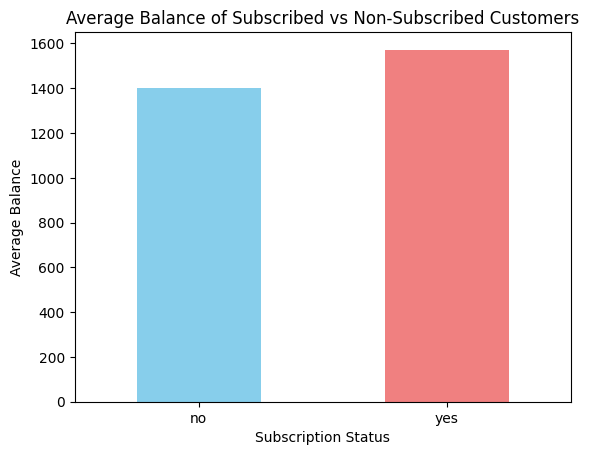

In [ ]:
Average_balance.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Balance of Subscribed vs Non-Subscribed Customers')
plt.xlabel('Subscription Status')
plt.ylabel('Average Balance')
plt.xticks(rotation=0)
plt.show()

**4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.**

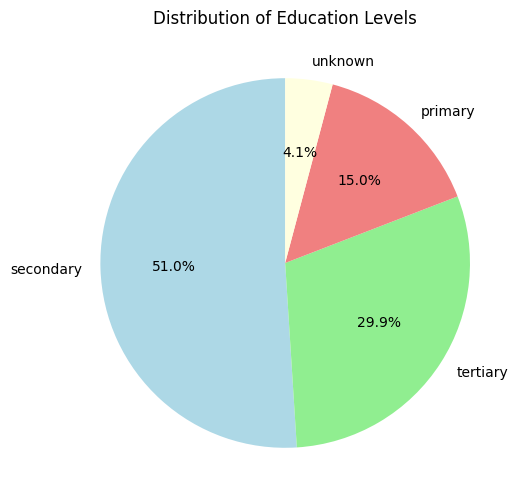

In [ ]:
education_counts = data['education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Education Levels')
plt.show()

**5. Create a function that should be able to create a new feature(Variable) called season using the month column.**

In [ ]:
def add_season_feature(data):
    month_to_season = {
        'jan': 'Winter', 'feb': 'Winter', 'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
        'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer', 'sep': 'Autumn', 'oct': 'Autumn', 'nov': 'Autumn', 'dec': 'Winter'}

    data['season'] = data['month'].map(month_to_season)
    return data

data = add_season_feature(data)


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring


**6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.**

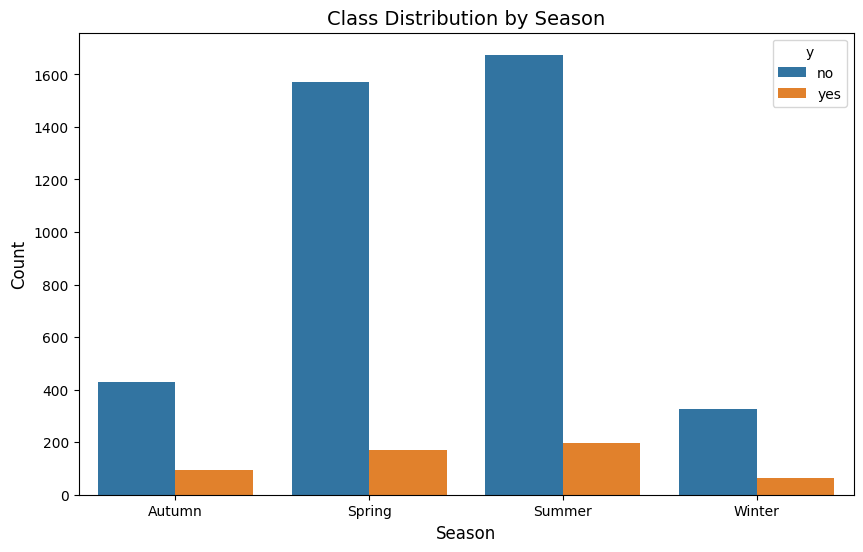

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', hue='y')
plt.title('Class Distribution by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.**

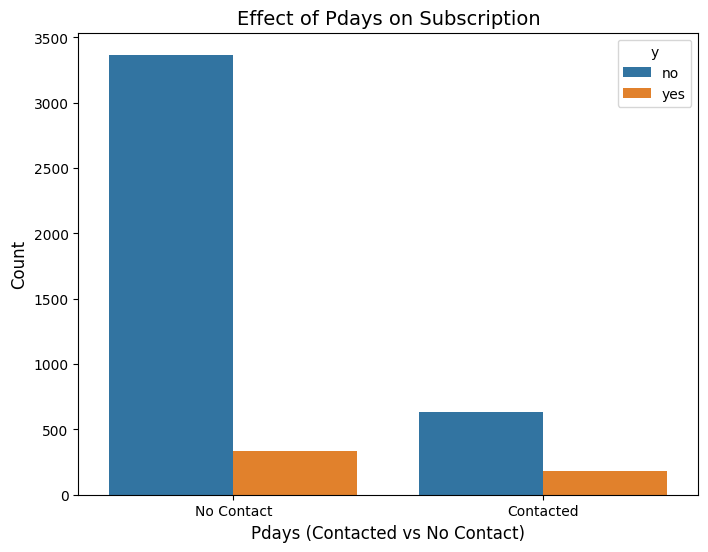

In [ ]:
data['pdays_effect'] = data['pdays'].apply(lambda x: 'No Contact' if x == -1 else 'Contacted')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='pdays_effect', hue='y')
plt.title('Effect of Pdays on Subscription', fontsize=14)
plt.xlabel('Pdays (Contacted vs No Contact)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**There is a signifcant increase in the subscription id they contacted based on pdays**

**8.Replace the -1 as nan values for the P-days store.**

In [ ]:
data['pdays'] = data['pdays'].replace(-1, np.nan)

**9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number**

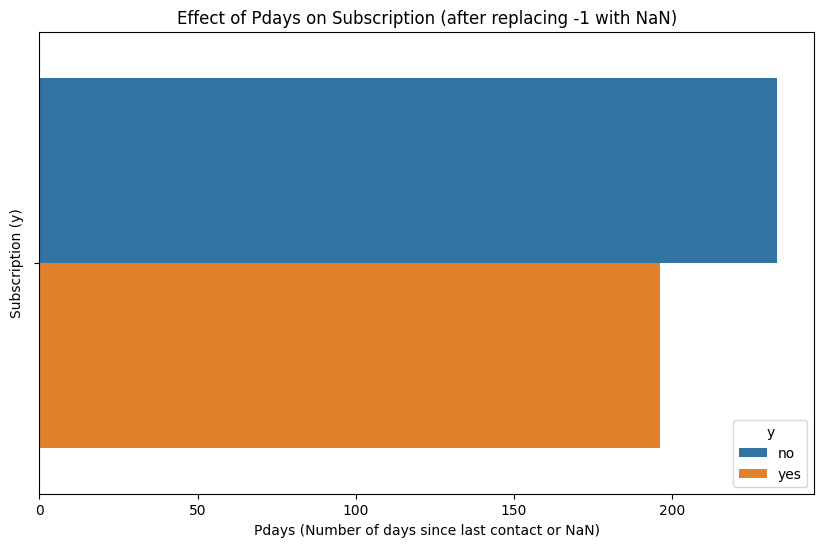

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pdays', hue='y', data=data, ci=None)  # 'ci=None' removes confidence intervals for better clarity
plt.title("Effect of Pdays on Subscription (after replacing -1 with NaN)")
plt.xlabel("Pdays (Number of days since last contact or NaN)")
plt.ylabel("Subscription (y)")
plt.show()

**10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question**

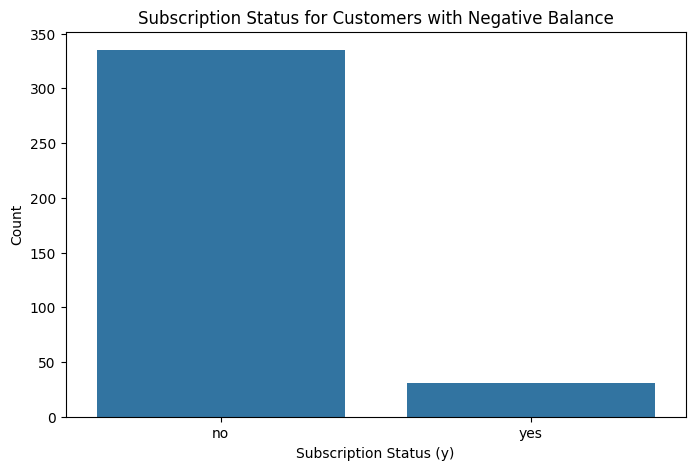

In [ ]:
# Filtering customers with balance less than 0
negative_balance_customers = data[data['balance'] < 0]
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=negative_balance_customers)
plt.title("Subscription Status for Customers with Negative Balance")
plt.xlabel("Subscription Status (y)")
plt.ylabel("Count")
plt.show()

**11. Use Pivot table to find the maximum balance for each type of job.**

In [ ]:
# Createing a pivot table
pivot_table_balance = data.pivot_table(values='balance',
                                      index='job',
                                      aggfunc='max')
print(pivot_table_balance)


               balance
job                   
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337


**12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed**

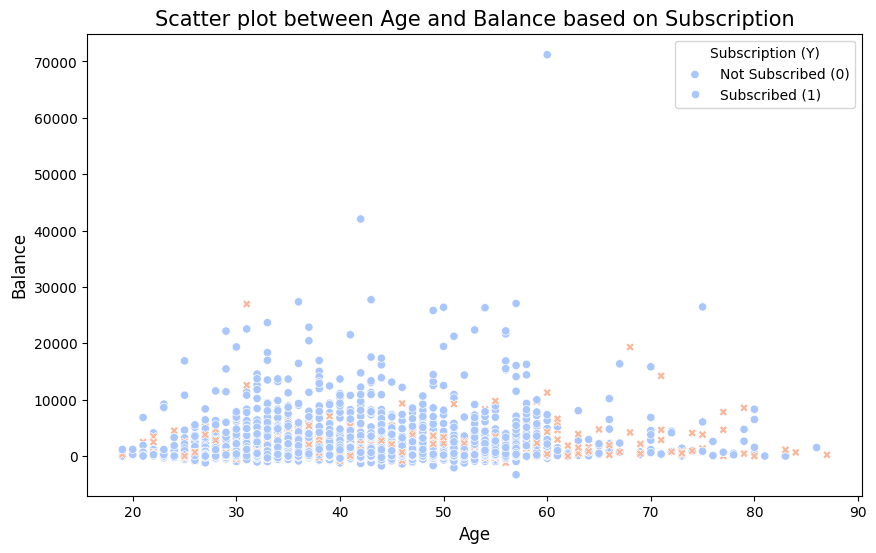

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='balance', hue='y', palette='coolwarm', style='y', markers=["o", "X"])
plt.title('Scatter plot between Age and Balance based on Subscription', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(title='Subscription (Y)', labels=['Not Subscribed (0)', 'Subscribed (1)'])
plt.show()

**13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.**

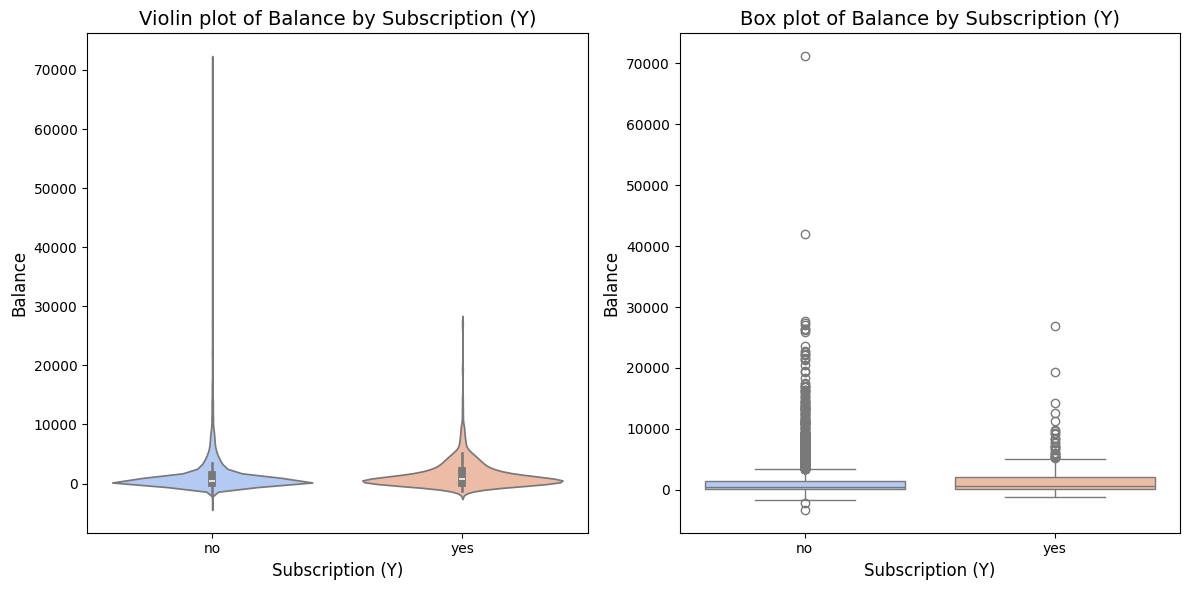

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='y', y='balance', palette='coolwarm')
plt.title('Violin plot of Balance by Subscription (Y)', fontsize=14)
plt.xlabel('Subscription (Y)', fontsize=12)
plt.ylabel('Balance', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='y', y='balance', palette='coolwarm')
plt.title('Box plot of Balance by Subscription (Y)', fontsize=14)
plt.xlabel('Subscription (Y)', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.tight_layout()
plt.show()

**14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method**

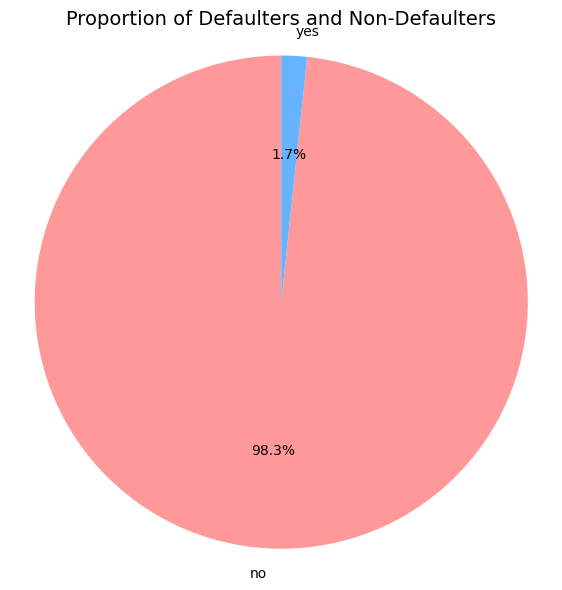

In [ ]:
default_counts = data['default'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Defaulters and Non-Defaulters', fontsize=14)
plt.axis('equal')
plt.show()

**15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.**

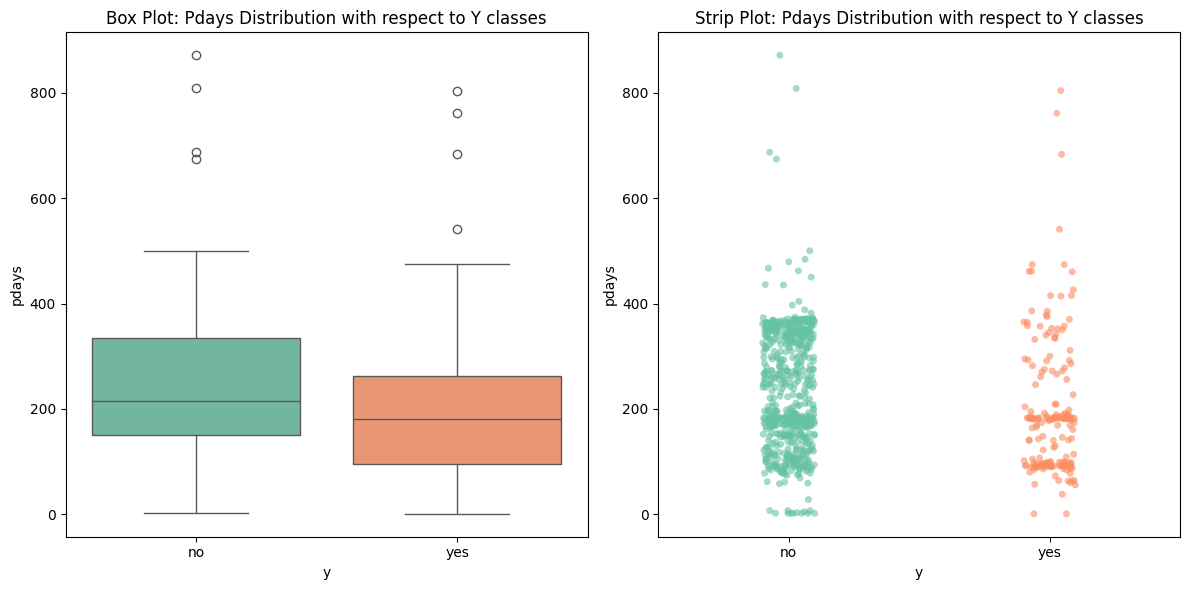

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='pdays', data=data, palette='Set2')
plt.title('Box Plot: Pdays Distribution with respect to Y classes')

plt.subplot(1, 2, 2)
sns.stripplot(x='y', y='pdays', data=data, jitter=True, palette='Set2', alpha=0.6)
plt.title('Strip Plot: Pdays Distribution with respect to Y classes')
plt.tight_layout()
plt.show()